In [206]:
import sys
!{sys.executable} -m pip install seaborn

In [207]:
%matplotlib inline
import numpy as np
import pandas as pd 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid' , palette='tab10')
train=pd.read_csv('all/train.csv')

#Missing value check
# train set
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [208]:
# test set
test=pd.read_csv('all/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [209]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


[<matplotlib.text.Text at 0x15eff3eb8>, <matplotlib.text.Text at 0x157e06550>]

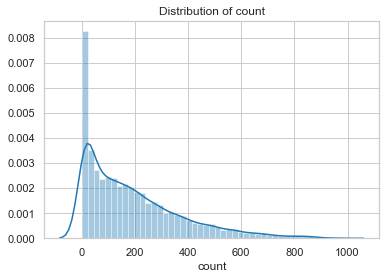

In [210]:
#distribution of count
fig = plt.figure()
sns.distplot(train['count'])

ax.set(xlabel='count',title='Distribution of count',)

In [211]:
# Remove outliers from more than three standard deviations
removeOutliers = train[np.abs(train['count']-
                        train['count'].mean())<=(3*train['count'].std())] 
removeOutliers.shape

(10739, 12)

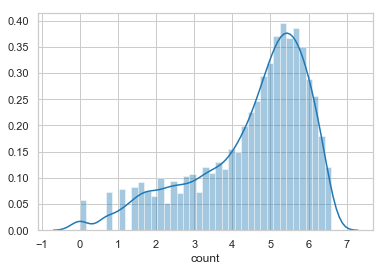

In [212]:
#log transformation 
y=removeOutliers['count']
ylog=np.log(y)
sns.distplot(ylog)

In [213]:
removeOutliers['count'] .describe()

count    10739.000000
mean       183.003818
std        166.681429
min          1.000000
25%         41.000000
50%        141.000000
75%        276.000000
max        734.000000
Name: count, dtype: float64

In [243]:
# concatenate train and test 
fullData = pd.concat([removeOutliers,test],ignore_index=True)

fullData.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [215]:
fullData['date']=fullData.datetime.apply( lambda c : c.split( )[0])
fullData['hour']=fullData.datetime.apply( lambda c : int(c.split( )[1].split(':')[0]))
fullData['year']=fullData.datetime.apply( lambda c : int( c.split( )[0].split('-')[0]))
fullData['month']=fullData.datetime.apply( lambda c : int(c.split( )[0].split('-')[1]))
fullData['weekday']=fullData.date.apply( lambda c : datetime.strptime(c,'%Y-%m-%d').isoweekday())

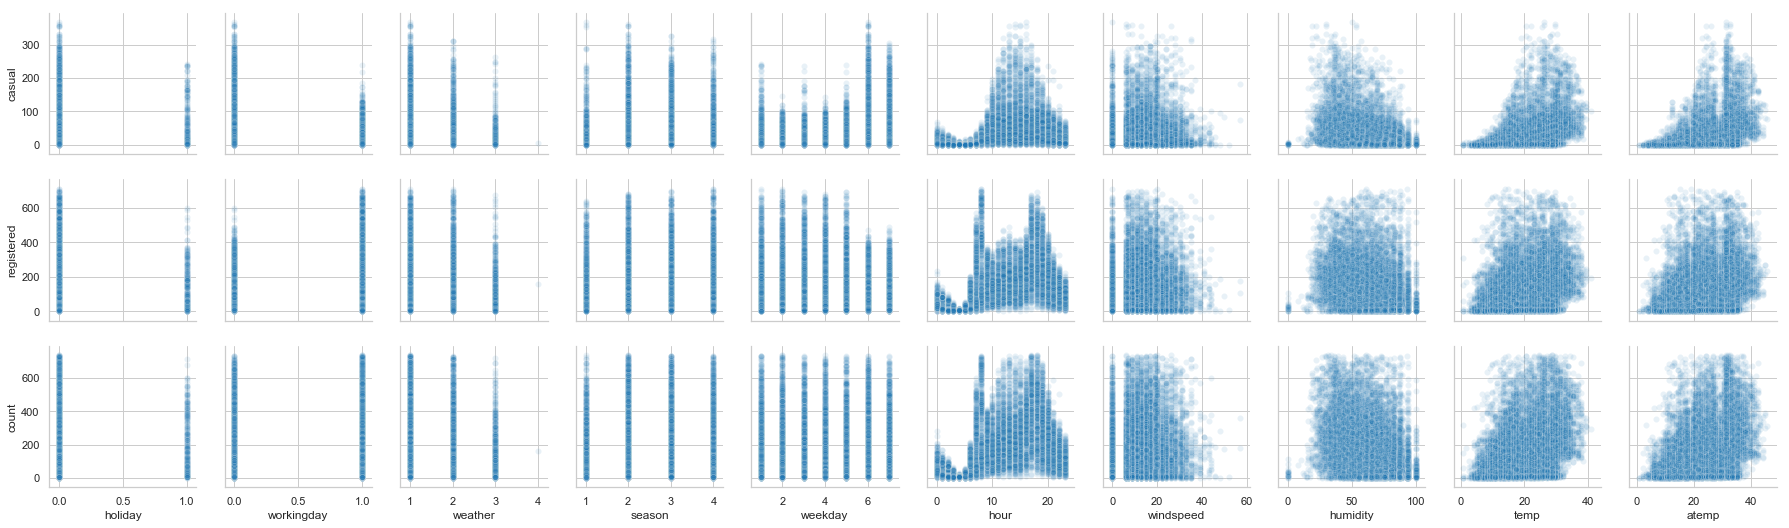

In [216]:
sns.pairplot(fullData ,x_vars=['holiday','workingday','weather','season',
                                'weekday','hour','windspeed','humidity','temp','atemp'] ,
                        y_vars=['casual','registered','count'] , plot_kws={'alpha': 0.1})

In [217]:
# Correlation matrix
corr = fullData.corr() 

# descending sort
corr['count'].sort_values(ascending =False)

count         1.000000
registered    0.966209
casual        0.704764
hour          0.405437
temp          0.385954
atemp         0.381967
year          0.234959
month         0.164673
season        0.159801
windspeed     0.106074
weekday       0.022602
holiday       0.002978
workingday   -0.020764
weather      -0.127519
humidity     -0.317028
Name: count, dtype: float64

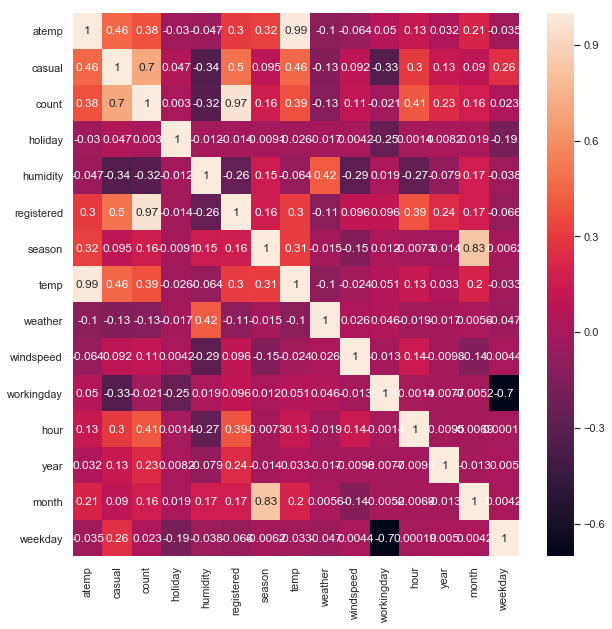

In [218]:
# Correlation between "count” and other fields
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr,annot = True)

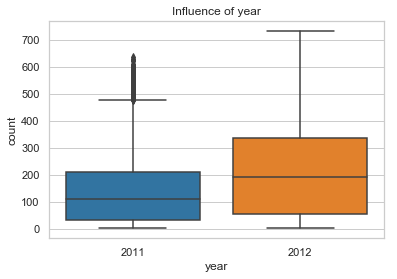

In [219]:
sns.boxplot(x='year', y='count', data = fullData)
plt.title("Influence of year")
plt.show()

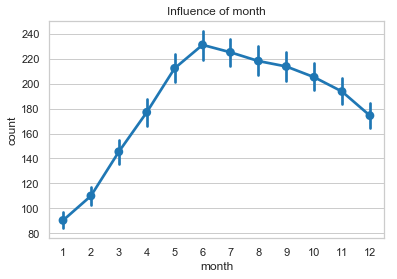

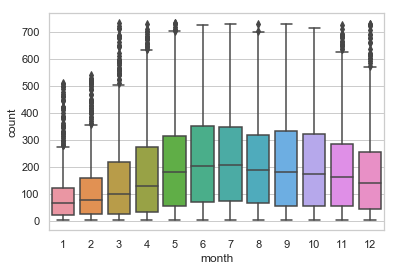

In [220]:
sns.pointplot(x='month', y='count', data = fullData)
plt.title("Influence of month")
plt.show()
sns.boxplot(x='month', y='count', data = fullData)

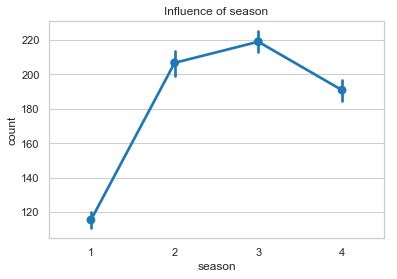

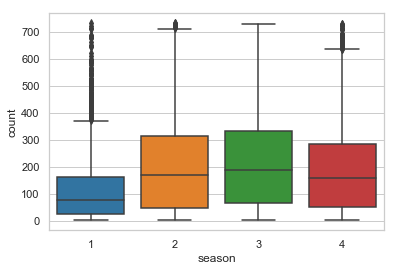

In [221]:
sns.pointplot(x='season', y='count', data = fullData)
plt.title("Influence of season")
plt.show()
sns.boxplot(x='season', y='count', data = fullData)

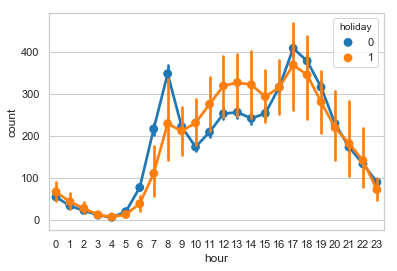

In [222]:
sns.pointplot(x='hour', y='count', hue='holiday', data=fullData)

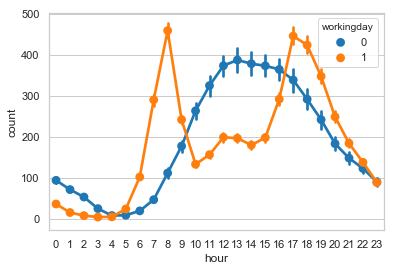

In [223]:
sns.pointplot(x='hour', y='count', hue='workingday', data=fullData)

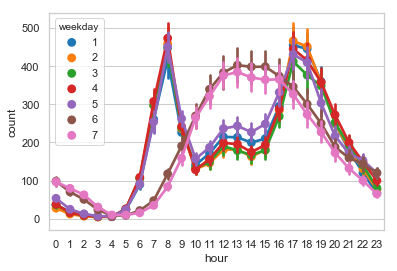

In [224]:
sns.pointplot(x='hour', y='count', hue='weekday', data = fullData)

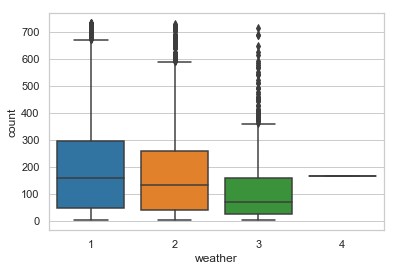

In [225]:
sns.boxplot(x='weather', y='count', data = fullData)

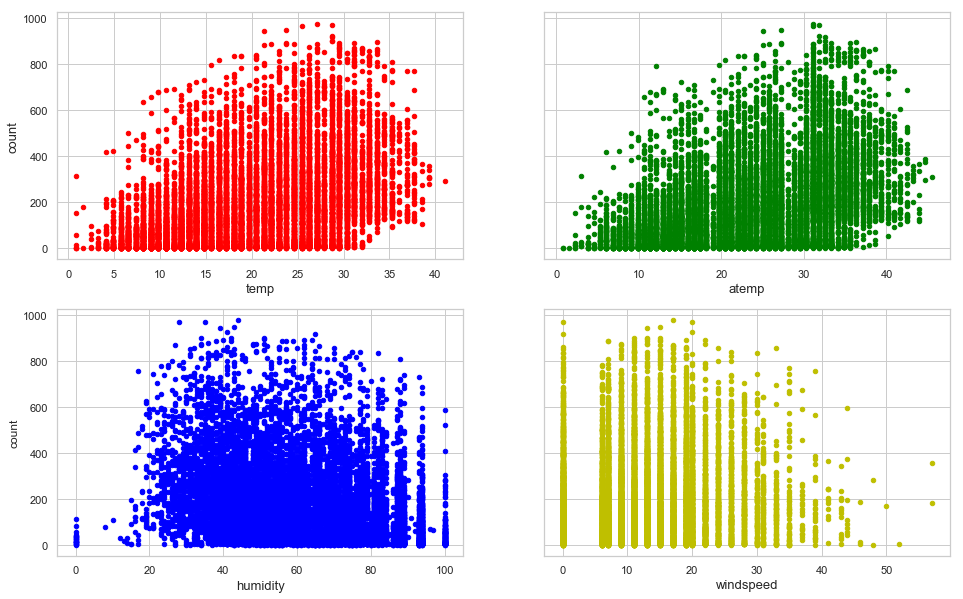

In [226]:
fig=plt.figure(1,figsize=(16,10))
ax1=plt.subplot(2,2,1)
train.plot(ax=ax1,kind='scatter',x='temp',y='count',color='r',sharey=True)
ax2=plt.subplot(2,2,2)
train.plot(ax=ax2,kind='scatter',x='atemp',y='count',color='g',sharey=True)
ax3=plt.subplot(2,2,3)
train.plot(ax=ax3,kind='scatter',x='humidity',y='count',color='b',sharey=True)
ax4=plt.subplot(2,2,4)
train.plot(ax=ax4,kind='scatter',x='windspeed',y='count',color='y',sharey=True)

ax1.set_xlabel('temp',fontsize=13)
ax2.set_xlabel('atemp',fontsize=13)
ax3.set_xlabel('humidity',fontsize=13)
ax4.set_xlabel('windspeed',fontsize=13)

ax1.set_ylabel('count',fontsize=13)

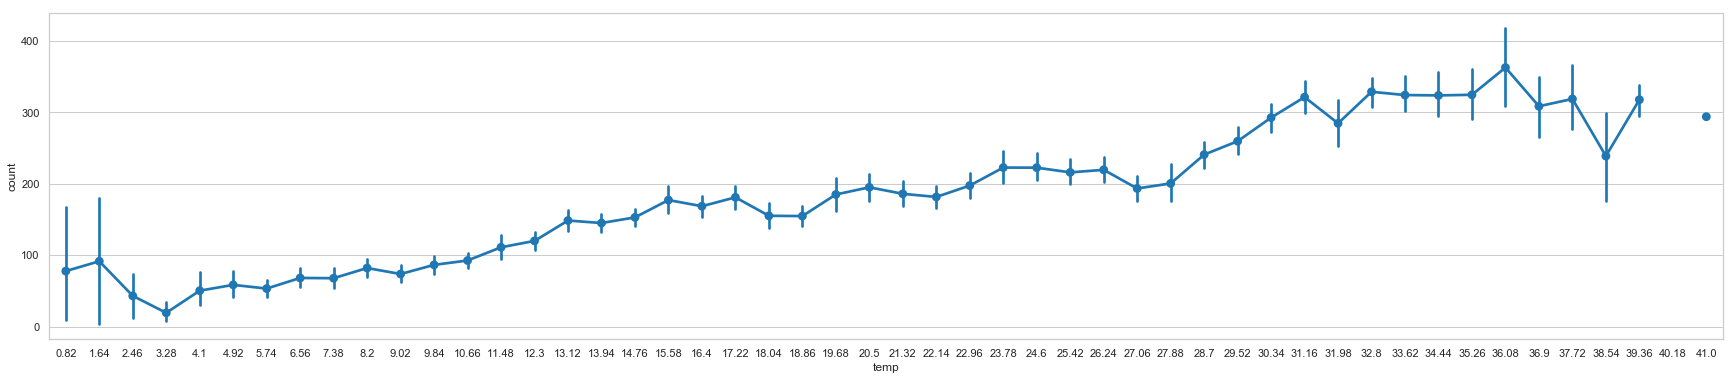

In [227]:
fig = plt.figure(figsize=(30,6))
sns.pointplot(x='temp', y='count', data = fullData)

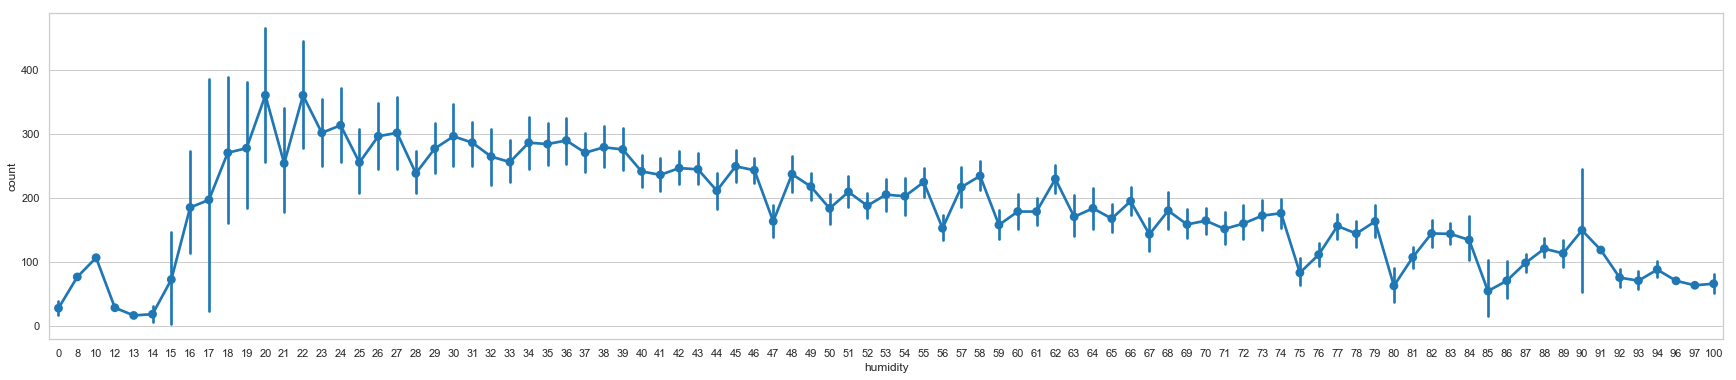

In [228]:
fig = plt.figure(figsize=(30,6))
sns.pointplot(x='humidity', y='count', data = fullData)

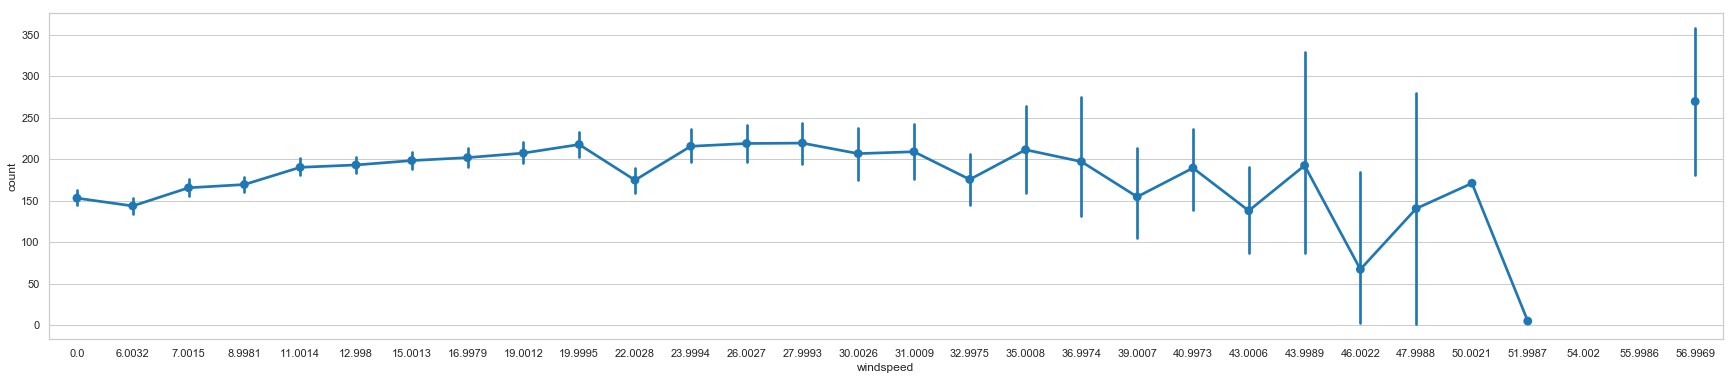

In [229]:
fig = plt.figure(figsize=(30,6))
sns.pointplot(x='windspeed', y='count', data = fullData)

In [230]:
#Feature Engineering
dhour = pd.get_dummies(fullData['hour'], prefix= 'hour')
dseason=pd.get_dummies(fullData['season'],prefix='season')
dweather=pd.get_dummies(fullData['weather'],prefix='weather')
dyear=pd.get_dummies(fullData['year'],prefix='year')

# concatenate new features and original data
full_feature = pd.concat([fullData,dhour,dseason,dweather,dyear],axis=1)

# delete redundant 
drop = ['season','weather','year','hour','date','datetime','casual','registered','atemp']
full_feature = full_feature.drop(drop ,axis = 1)

In [231]:
# divided train and test set
dataTrain = full_feature[pd.notnull(full_feature['count'])]
dataTest= full_feature[~pd.notnull(full_feature['count'])]

print(dataTrain.shape[0],dataTest.shape[0])

# get y
y = dataTrain['count']
fullTrain_y= np.log(y)

# get X 
fullTrain_X = dataTrain.drop(['count'],axis = 1)
test_X = dataTest.drop(['count'],axis = 1)


10739 6493


In [232]:
from sklearn.cross_validation import train_test_split 

print("The number of the samples in whole train set is: ", fullTrain_X.shape[0])

# Splitting Train And Validation Data
train_X, validation_X, train_y, validation_y = train_test_split(fullTrain_X ,
                                                    fullTrain_y,
                                                    train_size = 0.7)

print("The number of the samples in train set after split is: ", train_X.shape[0])
print("The number of the samples in validation set after split is: ", validation_X.shape[0])

The number of the samples in whole train set is:  10739
The number of the samples in train set after split is:  7517
The number of the samples in validation set after split is:  3222


In [233]:
from sklearn.metrics import mean_squared_error,r2_score

In [234]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# Initialize linear regression model
lModel = LinearRegression()

# Train the model
lModel.fit(train_X, train_y)
pred = lModel.predict(validation_X)

print("mean_squared_error for Linear Regression:",mean_squared_error(validation_y, pred))

mean_squared_error for Linear Regression: 0.385381767228


In [236]:
# Initialize ridge regression model
rModel = Ridge(alpha=0.1, max_iter=3000)
rModel.fit(train_X , train_y)
pred = rModel.predict(validation_X)
print("mean_squared_error for Ridge Regression:",mean_squared_error(validation_y, pred))

mean_squared_error for Ridge Regression: 0.385352189418


In [237]:
# Initialize lasso regression model
lassoModel = Lasso(alpha=0.001, max_iter=3000)
lassoModel.fit(train_X , train_y)
pred = lassoModel.predict(validation_X)
print("mean_squared_error for Lasso Regression:",mean_squared_error(validation_y, pred))

mean_squared_error for Lasso Regression: 0.384943512374


In [238]:
# Initialize random forest regression model
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=1000 , random_state = 42)
rfModel.fit(train_X , train_y)
pred = rfModel.predict(validation_X)
print("mean_squared_error for RandomForest Regression:",mean_squared_error(validation_y, pred))

mean_squared_error for RandomForest Regression: 0.124153694194


In [239]:
# Initialize decision tree regression model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=2)
dt.fit(train_X , train_y)
pred = dt.predict(validation_X)
print("mean_squared_error for DecisionTreeRegressor Regression:",mean_squared_error(validation_y, pred))

mean_squared_error for DecisionTreeRegressor Regression: 0.189813116061


In [240]:
# Initialize xgboosting regression model
from xgboost import XGBRegressor
xgbr = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100)
xgbr.fit(train_X , train_y)
pred = xgbr.predict(validation_X)
print("mean_squared_error for XGBoost Regression:",mean_squared_error(validation_y, pred))

mean_squared_error for XGBoost Regression: 0.245422829685


In [241]:
# Initialize Multi-layer perceptron regression model
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(alpha=0.0001, max_iter=200)
mlp.fit(train_X , train_y)
pred = mlp.predict(validation_X)
print("mean_squared_error for Multi-layer Perceptron Regression:",mean_squared_error(validation_y, pred))

mean_squared_error for Multi-layer Perceptron Regression: 0.143648025774


In [242]:
# output the best prediction
predict = gbModel.predict(test_X)
# Because did log transformation before, do exponent movement to get the final predicted result.
prediction = pd.DataFrame({
        "count": [max(0, x) for x in np.exp(predict)]  
    })
prediction.to_csv('predictionsWithGB.csv', index=False)